簡單MLP神經網路架設預測diabetes，第一個程式使用sigmoid輸出啟動函式，這邊使用softmax輸出啟動函式，與第一程式比較差異，以及損失函式準確率圖形觀察，以及模型調整。

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

#  load Diabetes data

In [2]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
np.random.seed(10)
datasets = df_diabetes.values
np.random.shuffle(datasets)

In [4]:
X = datasets[:,0:8]
y = datasets[:,8]

In [5]:
y = tf.keras.utils.to_categorical(y)

In [6]:
X -=X.mean(axis=0)
X /= X.std(axis=0)

In [7]:
X_train,y_train = X[:690],y[:690]
X_test,y_test = X[690:],y[690:]

In [8]:
print(X_test.shape)

(78, 8)


In [9]:
model = Sequential([
    Dense(10,input_shape = (8,),activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(2,activation = 'softmax')
])

In [10]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [11]:
#validation_data：驗證資料集，在訓練時驗證
history = model.fit(X_train,y_train,
                   validation_data = (X_test,y_test),
                   epochs = 150 , batch_size = 10)

Train on 690 samples, validate on 78 samples
Epoch 1/150
690/690 [==============================] - 1s 1ms/sample - loss: 0.9105 - accuracy: 0.3536 - val_loss: 0.7845 - val_accuracy: 0.4744
Epoch 2/150
690/690 [==============================] - 0s 302us/sample - loss: 0.7593 - accuracy: 0.4826 - val_loss: 0.7129 - val_accuracy: 0.5897
Epoch 3/150
690/690 [==============================] - 0s 293us/sample - loss: 0.6946 - accuracy: 0.6043 - val_loss: 0.6716 - val_accuracy: 0.6282
Epoch 4/150
690/690 [==============================] - 0s 290us/sample - loss: 0.6554 - accuracy: 0.6507 - val_loss: 0.6423 - val_accuracy: 0.6410
Epoch 5/150
690/690 [==============================] - 0s 291us/sample - loss: 0.6265 - accuracy: 0.6768 - val_loss: 0.6164 - val_accuracy: 0.7051
Epoch 6/150
690/690 [==============================] - 0s 267us/sample - loss: 0.5964 - accuracy: 0.7029 - val_loss: 0.5928 - val_accuracy: 0.7308
Epoch 7/150
690/690 [==============================] - 0s 289us/sample - lo

690/690 [==============================] - 0s 176us/sample - loss: 0.4179 - accuracy: 0.7928 - val_loss: 0.5169 - val_accuracy: 0.7564
Epoch 57/150
690/690 [==============================] - 0s 159us/sample - loss: 0.4158 - accuracy: 0.7957 - val_loss: 0.5222 - val_accuracy: 0.7436
Epoch 58/150
690/690 [==============================] - 0s 167us/sample - loss: 0.4159 - accuracy: 0.7971 - val_loss: 0.5236 - val_accuracy: 0.7436
Epoch 59/150
690/690 [==============================] - 0s 163us/sample - loss: 0.4156 - accuracy: 0.7942 - val_loss: 0.5206 - val_accuracy: 0.7436
Epoch 60/150
690/690 [==============================] - 0s 178us/sample - loss: 0.4151 - accuracy: 0.7884 - val_loss: 0.5198 - val_accuracy: 0.7436
Epoch 61/150
690/690 [==============================] - 0s 163us/sample - loss: 0.4139 - accuracy: 0.7913 - val_loss: 0.5170 - val_accuracy: 0.7564
Epoch 62/150
690/690 [==============================] - 0s 195us/sample - loss: 0.4133 - accuracy: 0.7942 - val_loss: 0.5194 

690/690 [==============================] - 0s 160us/sample - loss: 0.3909 - accuracy: 0.8145 - val_loss: 0.5314 - val_accuracy: 0.7821
Epoch 112/150
690/690 [==============================] - 0s 155us/sample - loss: 0.3914 - accuracy: 0.8116 - val_loss: 0.5360 - val_accuracy: 0.7692
Epoch 113/150
690/690 [==============================] - 0s 162us/sample - loss: 0.3907 - accuracy: 0.8145 - val_loss: 0.5299 - val_accuracy: 0.7692
Epoch 114/150
690/690 [==============================] - 0s 163us/sample - loss: 0.3897 - accuracy: 0.8159 - val_loss: 0.5254 - val_accuracy: 0.7692
Epoch 115/150
690/690 [==============================] - 0s 158us/sample - loss: 0.3897 - accuracy: 0.8101 - val_loss: 0.5357 - val_accuracy: 0.7692
Epoch 116/150
690/690 [==============================] - 0s 179us/sample - loss: 0.3908 - accuracy: 0.8145 - val_loss: 0.5363 - val_accuracy: 0.7564
Epoch 117/150
690/690 [==============================] - 0s 157us/sample - loss: 0.3892 - accuracy: 0.8101 - val_loss: 0

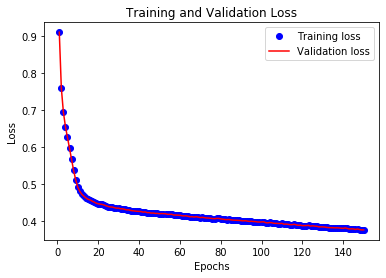

In [12]:
#繪出訓練和驗證的損失圖表

#圖表可看出訓練集在反覆學習後，損失下降準確率會上升;但驗證集約在10次訓練週期左右
#其損失沒有再下降，反而上升，所以代表訓練週期大概落在10左右就可以了。
loss = history.history['loss']
epochs = range(1,len(loss)+1)
val_loss = history.history['val_loss']
plt.plot(epochs , loss , 'bo' , label='Training loss')
plt.plot(epochs , loss , 'r' , label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

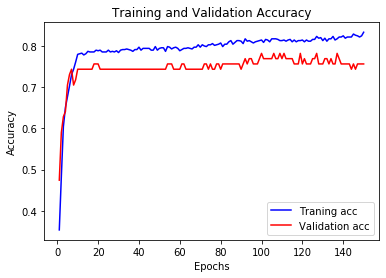

In [13]:
#繪出訓練和驗證的準確率圖表
#下圖可看出訓練集資料準確度明顯提升，但驗證集在10次訓練後，其準確度沒有提升。
acc = history.history['accuracy']
epochs = range(1,len(acc)+1)
val_acc = history.history['val_accuracy']
plt.plot(epochs , acc ,'b-' , label = 'Traning acc')
plt.plot(epochs , val_acc , 'r-' , label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()